# Figure 1

- Panel A: Class count bar chart colored by phenotype category
- Panel B: Workflow plot of image analysis, image-based profiling, machine learning, and assessing generalizability

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))

# Load variables important for plotting (e.g., themes, phenotypes, etc.)
source("themes.r")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Set paths

In [2]:
figure_dir <- "figures"
output_main_figure_1 <- file.path(figure_dir, "main_figure_1_class_count_and_workflow.png")

## Load in class counts CSV

In [3]:
url <- "https://raw.githubusercontent.com/WayScience/mitocheck_data/b7abbdfda06d8dcc8e897cb9b89674b8d7a49c49/4.analyze_data/results/single_cell_class_counts.csv"
class_count_df <- read.csv(url)

# only take the rows from ic data type
class_count_df <- subset(class_count_df, Dataset_Type == 'ic')

# remove folded class as it isn't used the analysis
class_count_df <- subset(class_count_df, Mitocheck_Phenotypic_Class != 'Folded')

# add category as a column
# Now phenotype_categories is available in your script
class_count_df <- class_count_df %>%
  mutate(Phenotype_Category = case_when(
    Mitocheck_Phenotypic_Class %in% phenotype_categories$Interphase ~ "Interphase",
    Mitocheck_Phenotypic_Class %in% phenotype_categories$Mitosis ~ "Mitosis",
    Mitocheck_Phenotypic_Class %in% phenotype_categories$`Mitotic conseq.` ~ "Mitotic conseq.",
    Mitocheck_Phenotypic_Class %in% phenotype_categories$`Dynamic changes` ~ "Dynamic changes",
    Mitocheck_Phenotypic_Class %in% phenotype_categories$Other ~ "Other",
    TRUE ~ "Unknown"
  ))

dim(class_count_df)
head(class_count_df)

[1] 15  5

,X,Mitocheck_Phenotypic_Class,Single_Cell_Counts,Dataset_Type,Phenotype_Category
,<int>,<chr>,<int>,<chr>,<chr>
1,0,Interphase,420,ic,Interphase
2,1,Polylobed,367,ic,Mitotic conseq.
3,2,Prometaphase,345,ic,Mitosis
4,3,OutOfFocus,304,ic,Other
5,4,Apoptosis,273,ic,Other
6,5,Binuclear,184,ic,Mitotic conseq.


## Create bar chart with class counts

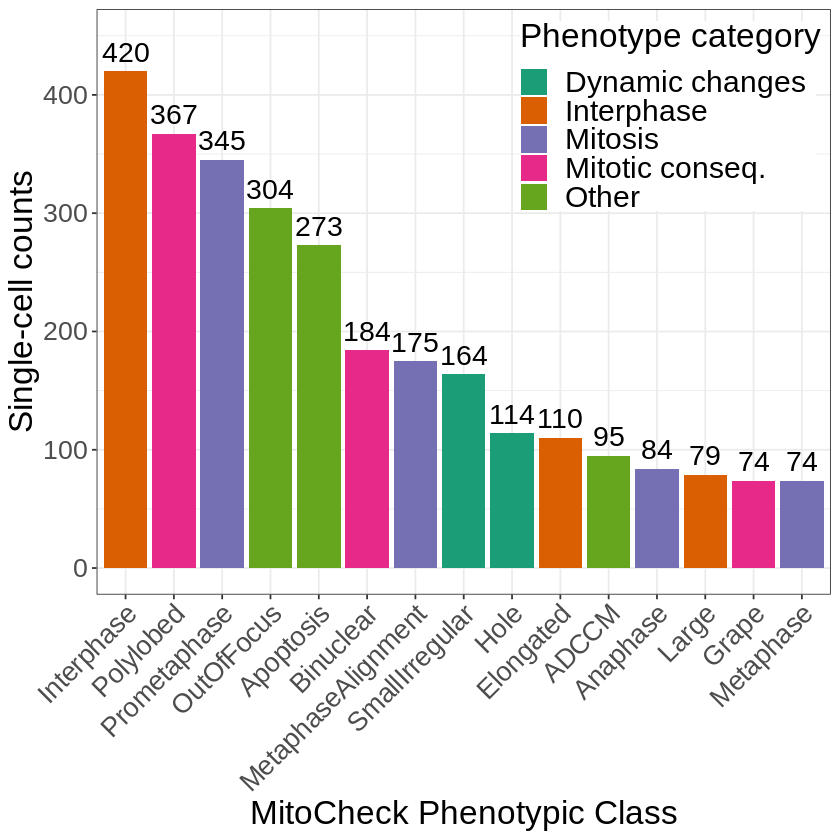

In [4]:
# Reorder Mitocheck_Phenotypic_Class based on the sum of Single_Cell_Counts
class_count_df$Mitocheck_Phenotypic_Class <- reorder(class_count_df$Mitocheck_Phenotypic_Class, -class_count_df$Single_Cell_Counts)

# Creating the bar chart
class_counts_plot <-
  ggplot(class_count_df, aes(x = Mitocheck_Phenotypic_Class, y = Single_Cell_Counts, fill = Phenotype_Category)) +
  geom_bar(stat = "identity", position = "dodge") +
  
  # Adding labels and title
  labs(x = "MitoCheck Phenotypic Class", y = "Single-cell counts", fill = "Phenotype category") +
  
  theme_bw() + 

  scale_fill_brewer(palette = "Dark2") +
  
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),  # Adjust font size for x-axis labels
    axis.text.y = element_text(size = 16),  # Adjust font size for y-axis labels
    axis.title.x = element_text(size = 20),  # Adjust font size for x-axis title
    axis.title.y = element_text(size = 20),  # Adjust font size for y-axis title
    legend.title = element_text(size = 20),  # Adjust font size for legend title
    legend.text = element_text(size = 18),  # Adjust font size for legend text
    legend.position = c(0.98, 0.98),  # Adjust the position of the legend within the plot
    legend.justification = c("right", "top"),  # Align legend to the right and top
    legend.box.just = "right",  # Justify the legend box to the right
    legend.margin = margin(0, 0, 0, 0)  # Remove extra margin around the legend
  ) +
  
  # Adding annotations above each bar as integers in bold
  geom_text(
    aes(label = ifelse(Single_Cell_Counts != 0, as.character(Single_Cell_Counts), "")),
    position = position_dodge(width = 0.9), vjust = -0.5,
    size = 6  # Adjust font size for the count labels
  ) +
  
  # Set y-axis limit to 450
  ylim(0, 450)

class_counts_plot

## Load in workflow PNG

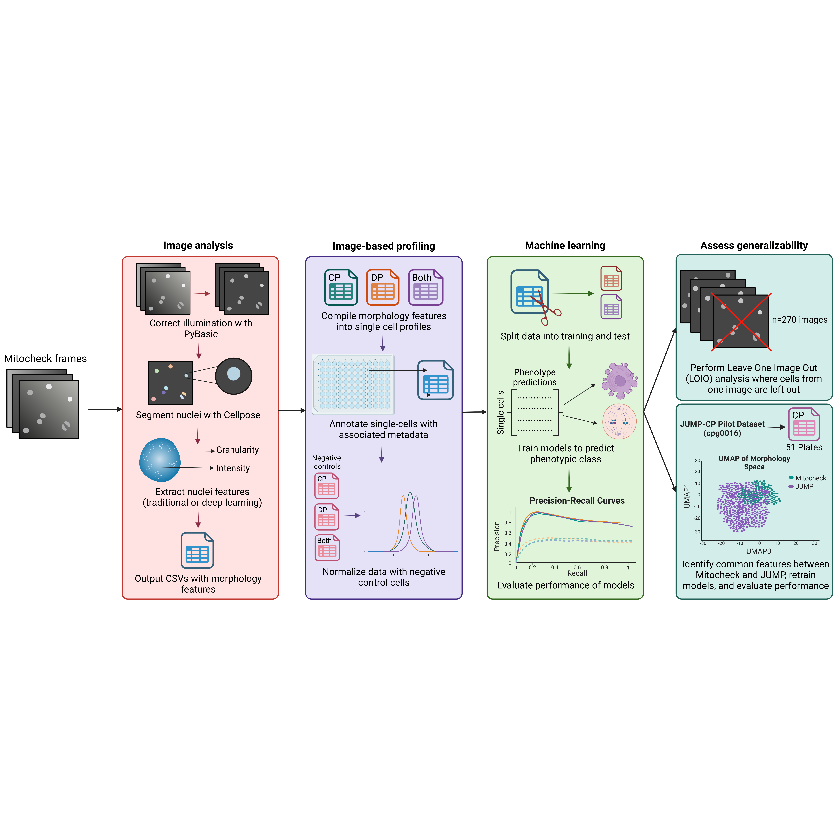

In [5]:
workflow_path = file.path("./figures/figure1_panelB.png")
workflow_img = png::readPNG(workflow_path)

# Get the dimensions of the image
img_height <- nrow(workflow_img)
img_width <- ncol(workflow_img)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the workflow image from BioRender to a ggplot object
workflow <- ggplot() +
  annotation_custom(
    rasterGrob(workflow_img, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

workflow

## Create figure 1 plot

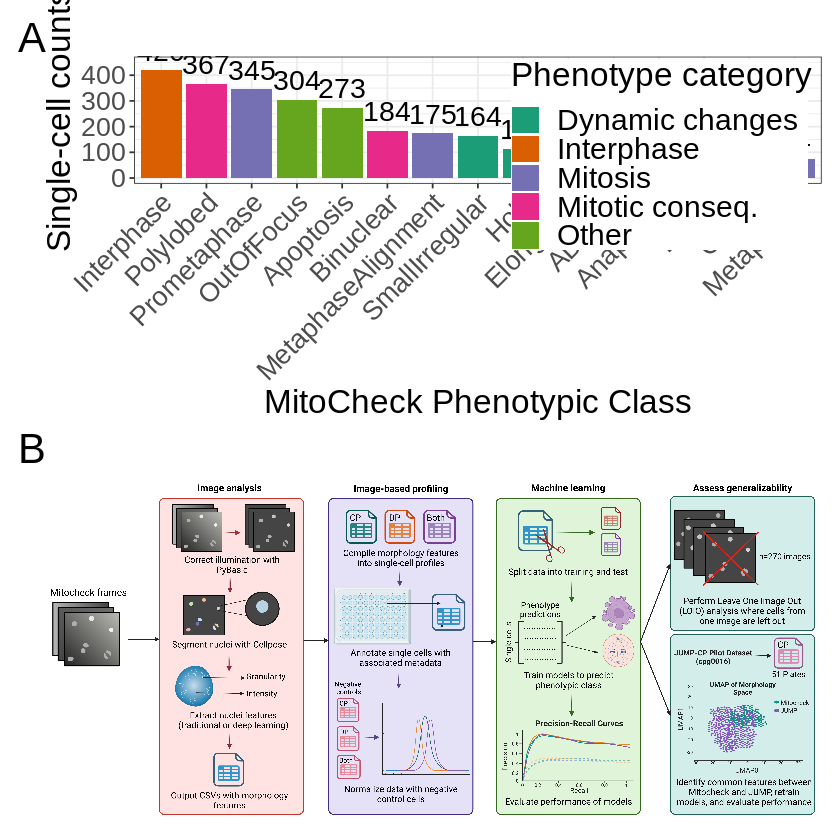

In [6]:
align_plot_gg <- (
    free(class_counts_plot) /
    workflow
) + plot_layout(heights = c(2, 2))

fig_1_gg <- (
  align_plot_gg
) + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 25))

# Save or display the plot
ggsave(output_main_figure_1, dpi = 500, height = 14, width = 14)

fig_1_gg